# **Análisis de Superstore para campaña de marketing**

  ## **Abstract**


Con el advenimiento del aprendizaje automático y la inteligencia artificial, son cada vez más las compañías que buscan incorporar estos campos a la planeación empresarial para poder lograr una mayor eficiencia en la toma de decisiones estratégicas. Las tiendas no son una excepción a ello y, con el paso de los años, han comenzado a incorporar dichas tecnologías para predecir el comportamiento de sus clientes y, de esta manera, enfocar sus campañas de Marketing hacia la dirección más oportuna. <br>
<br>
El presente trabajo está destinado al departamento de Marketing de la compañía 'Superstore!', el cual pretende predecir el comportamiento de sus clientes. Asimismo, éste se encuentra a disposición de todo el público que pudiera tener interés en él. Los datos han sido relevados y puestos a disposición por parte de la compañía.

### *Contexto*

La superstore 'Supercompras!' está planeando otorgar membresías doradas de 200 USD con descuentos especiales para sus clientes. La campaña se realizará a través de llamadas telefónicas y sólo a usuarios que ya sean clientes de la empresa. Para poder minimizar los costos de la campaña se pretende realizar un modelo predictivo para seleccionar aquellos clientes que tienen mayor probabilidad de aceptar la oferta.


### *Objetivo*

El objetivo del presente análisis es descubrir si existen factores que se relacionen con la decisión de aceptar la membresía por parte de los clientes y, en caso de ser afirmativo, descubrir cuáles son dichos factores y en qué medida cada uno de ellos contribuye a la decisión final. De esta manera se pretende poder predecir el comportamiento futuro de los clientes para, así, enfocar las campañas de marketing en aquellos a los que se les asocie una mayor probabilidad de aceptar la membresía.

## **Desarrollo**

### *Variables*

* `Response` (objetivo) - 1 si el cliente aceptó la oferta de la campaña, 0 si no.
* `ID` - Identificador único del cliente.
* `Year_Birth` - Edad.
* `Complain` - 1 si el cliente realizó alguna queja en los últimos 2 años, 0 si no.
* `Dt_Customer` - Fecha de inscripción del cliente a la compañía.
* `Education` - Nivel de educación.
* `Marital_Status` - Estado civil.
* `Kidhome` - Número de niños en el hogar.
* `Teenhome` - Número de adolescentes en el hogar.
* `Income` - Salario anual.
* `MntFishProducts` - Cantidad gastada en pescados en los últimos 2 años.
* `MntMeatProducts` - Cantidad gastada en carnes en los últimos 2 años.
* `MntFruits` - Cantidad gastada en frutas en los últimos 2 años.
* `MntSweetProducts` - Cantidad gastada en productos con azúcares en los últimos 2 años.
* `MntWines` - Cantidad gastada en vinos en los últimos 2 años.
* `MntGoldProds` - Cantidad gastada en productos de oro en los últimos 2 años.
* `NumDealsPurchases` - Número de compras con descuento realizadas.
* `NumCatalogPurchases` - Número de compras realizadas por catálogo (comprar productos para ser enviados por correo).
* `NumStorePurchases` - Número de compras realizadas directamente en la tienda.
* `NumWebPurchases` - Número de compras realizadas a través del sitio web de la compañía.
* `NumWebVisitsMonth` - Número de visitas al sitio web de la compañía en el último mes.
* `Recency` - Número de días desde la última compra.

### *Importación del dataset*

In [12]:
#from google.colab 
# drive
#import os
#drive.mount("/content/gdrive", force_remount=True)
#%cd "/content/gdrive/MyDrive/DataScience/Superstore_data"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pingouin as pg
import seaborn as sns
import math
from scipy import stats

In [13]:
df = pd.read_csv("superstore_data.csv", sep=',')
df.head(5)

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,11,0,34,2,3,1,2,7,1,0


### *Extracción, transformación y limpieza de datos*

##### Datos faltantes



Se tomó la decisión de eliminar aquellas entradas que contenían al menos un dato faltante.

In [14]:
df = df.dropna(how='any')
df = df.reset_index(drop=True)
df.head(5)

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,11,0,34,2,3,1,2,7,1,0


##### Tipo de datos

Se verificó que el tipo de dato de cada campo sea coherente con lo que exhibe.

In [15]:
df.dtypes

Id                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
Response                 int64
Complain                 int64
dtype: object

##### Estandarización de valores

Se estandarizaron aquellos valores que pertenecían a una misma categoría y se eliminaron los registros de aquellos otros que no podían incluirse en ninguna de estas por contener información incoherente.

In [16]:
df['Marital_Status'].value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

In [17]:
df['Education'].value_counts()

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

In [18]:
for i in range(0, df.shape[0]):
  status = df['Marital_Status'][i]
  if status in ('YOLO', 'Absurd'):
    df = df.drop(i)
  elif status == 'Alone':
    df['Marital_Status'][i] = 'Single'
df = df.reset_index(drop=True)
df.head(5)

C:\Users\sofif\AppData\Local\Temp\ipykernel_14852\575221230.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Marital_Status'][i] = 'Single'


,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,11,0,34,2,3,1,2,7,1,0


### *Análisis exploratorio de datos*

#### ¿Es el salario anual un factor influyente en la decisión de aceptar la membresía?

Para responder esta pregunta debemos evaluar si existen diferencias significativas entre la media salarial anual de las personas que aceptaron la membresía y la media salarial anual de las personas que no la aceptaron. Así nuestra variable respuesta será `Response` y nuestra variable predictora será `Income`.<br>
<br>
* Parámetro poblacional de interés: <br>
$ \mu_{1} - \mu_{2} $ <br>
donde: <br>
$ \mu_{1} $ : salario medio anual de las personas que no aceptaron la membresía. <br>
$ \mu_{2} $ : salario medio anual de las personas que aceptaron la membresía. <br>
<br>
* HIPÓTESIS: <br>
$ H_{0}: \mu_{0} - \mu_{1} = 0 $ <br>
$ H_{1}: \mu_{0} - \mu_{1} ≠ 0 $ <br>
<br>
* Estadístico muestral para realizar la estimación: <br>
$ T = \frac{x̄_{1} - x̄_{2}}{\sqrt{\frac{s^{2}_{1}}{n_{1}} + \frac{s^{2}_{2}}{n_{1}}}} $ <br>
donde: <br>
$ x̄_{1} $ : media muestral del salario anual de las personas que no aceptaron la membresía. <br>
$ x̄_{2} $ : media muestral del salario anual de las personas que aceptaron la membresía. <br>
$ s_{1} $ : desvío estándar muestral del salario anual de las personas que no aceptaron la membresía. <br>
$ s_{2} $ : desvío estándar muestral del salario anual de las personas que aceptaron la membresía. <br>
$ n_{1} $ : tamaño de la muestra de los salarios anuales de las personas que no aceptaron la membresía. <br>
$ n_{2} $ : tamaño de la muestra de los salarios anuales de las personas que no aceptaron la membresía. <br>
<br>
* Valor T crítico: <br>
Sea $ t_{\frac{\alpha}{2},\nu} $ el valor $ t_{critico} $ que deja un área de $ \frac{\alpha}{2} $ a derecha y un área de $ \frac{\alpha}{2} $ a izquierda con $ \nu $ grados de libertad. La hipótesis nula se rechazará si: <br>
$ T < -t_{\frac{\alpha}{2},\nu} $ o $ T > t_{\frac{\alpha}{2},\nu} $
<br>

* INTERVALO DE CONFIANZA: <br>
$ (x̄_{1} - x̄_{2}) - t_{\frac{\alpha}{2},\nu}\sqrt{\frac{s^{2}_{1}}{n_{1}} + \frac{s^{2}_{2}}{n_{1}}} $ , $ (x̄_{1} - x̄_{2}) + t_{\frac{\alpha}{2},\nu}\sqrt{\frac{s^{2}_{1}}{n_{1}} + \frac{s^{2}_{2}}{n_{1}}} $ <br>
Utilizaremos un nivel de confianza del 95% (es decir, un nivel de significancia $ \alpha $ del 5%). <br>
<br>
* Interpretación del intervalo de confianza: <br>
Si el 0 está contenido dentro del intervalo, entonces podremos afirmar con un 95% de confianza que existen diferencias significativas entre las medias de los salarios anuales de quienes aceptaron la membresía y quienes no lo hicieron. Por el contrario, si el 0 no está contenido, entonces no podremos afirmar que existan diferencias significativas.


##### Resumen numérico y gráfico

In [19]:
df.groupby('Response')['Income'].describe()

,count,mean,std,min,25%,50%,75%,max
Response,,,,,,,,
0,1881.0,50832.625199,25263.913081,1730.0,34421.0,50150.0,66313.0,666666.0
1,331.0,60187.752266,23231.596312,7500.0,39723.5,64090.0,80676.0,105471.0


<AxesSubplot: xlabel='Response', ylabel='Income'>

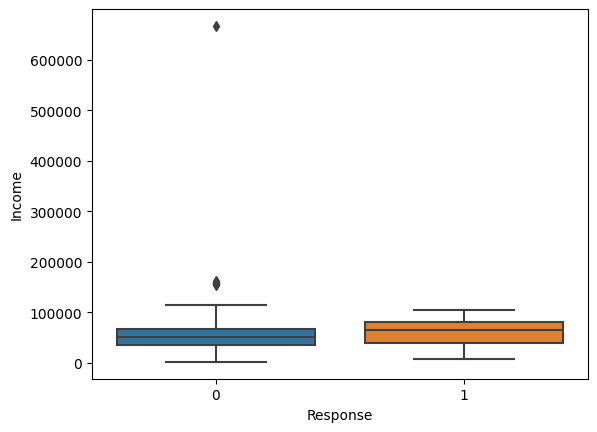

In [20]:
sns.boxplot(x='Response', y='Income', data=df)

<AxesSubplot: xlabel='Response', ylabel='Income'>

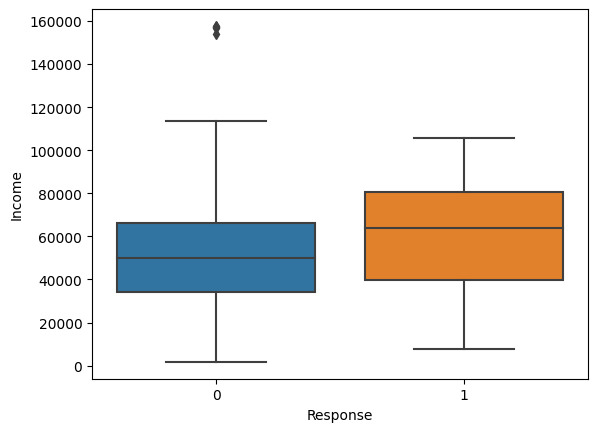

In [21]:
sns.boxplot(x='Response', y='Income', data=df[df['Income'] < 160000])

Se observa que la mediana de los salarios anuales de las personas que decidieron aceptar la membresía es ligeramente superior a la mediana de los salarios anuales de las personas que no lo hicieron. La variabilidad es ligeramente superior en los casos de las personas que no aceptaron la membresía y, además, esta distribución presenta outliers.

##### Estadístico muestral e intervalo de confianza

Cálculo del estadístico muestral $T$

In [22]:
resp_no = df[df['Response'] == 0]['Income']
resp_si = df[df['Response'] == 1]['Income']

x_1 = resp_no.mean()
x_2 = resp_si.mean()
s_1 = resp_no.std()
s_2 = resp_si.std()
n_1 = resp_no.size
n_2 = resp_si.size

T = (x_1 - x_2)/math.sqrt(s_1**2/n_1 + s_2**2/n_2)
print("T =", T)

T = -6.6654935134618425


Luego, para poder calcular nuestro valor $ t_{critico} $ necesitamos saber si las varianzas de nuestras muestras son iguales o diferentes, ya que los grados de libertad son muy sensibles a ello. Para esto utilizaremos el test de Levene. Si el p-valor obtenido es mayor a 0.05 podremos suponer que las varianzas de ambas muestras son iguales, mientras que si es menor supondremos que las mismas son diferentes.

In [23]:
# Test de levene para evaluar si las varianzas son iguales o no
print("p-valor =", stats.levene(resp_no, resp_si)[1])

p-valor = 0.011913056418450437


Como nuestro p-valor es de 0.012 aproximadamente, supondremos que las varianzas de las muestras son diferentes. Así, los grados de libertad estarán dados por: <br>
$ \nu = \frac{(\frac{s^{2}_{1}}{n_{1}} + \frac{s^{2}_{2}}{n_{2}})^2}{\frac{(\frac{s^{2}_{1}}{n_{1}})^{2}}{n_{1} - 1} + \frac{(\frac{s^{2}_{2}}{n_{2}})^{2}}{n_{2} - 1}} $ <br>
Habiendo obtenido esto, podremos calcular el $t_{critico}$. 

In [24]:
# Grados de libertad
gl = ((s_1**2/n_1) + (s_2**2/n_2))**2/(((s_1**2/n_1)**2)/(n_1 - 1) + ((s_2**2/n_2)**2)/(n_2 - 1))

# T crítico
alfa = 0.05
t = stats.t.ppf (q = 1-alfa/2, df = gl)
print("T-crítico: ", t)

T-crítico:  1.964939198427694


En este punto ya podemos observar que se cumple: <br>
$ T = -6.665 < -t_{\frac{\alpha}{2},\nu} = -1.965 $ , <br>
por lo que tenemos evidencias para rechazar la hipótesis nula.

Cálculo del intervalo de confianza:

In [25]:
IC = [x_1 - x_2 - t * math.sqrt((s_1**2/n_1) + (s_2**2/n_2)), x_1 - x_2 + t * math.sqrt((s_1**2/n_1) + (s_2**2/n_2))]
print("Intervalo de confianza:", IC)

Intervalo de confianza: [-12112.95075083839, -6597.303382159582]


Observamos que el intervalo de confianza no contiene al 0, por lo que nuevamente tenemos evidencia para descartar la hipótesis nula. Además, todos los valores del intervalo son negativos, lo que indica que la media del salario anual de las personas que aceptaron la membresía es mayor que la media del salario anual de las personas que no lo hicieron.

#### ¿Es el nivel educativo un factor que influye en la decisión de aceptar la membresía?

Para responder esta pregunta debemos evaluar si existen diferencias significativas entre las proporciones de personas que aceptaron la membresía en función de su nivel educativo. Así nuestra variable respuesta será `Response` y nuestra variable predictora será `Education`.<br>
<br>
* Parámetro poblacional de interés: <br>
$ p_{i} - p_{j} $ <br>
donde: <br>
$ p_{i} $ : proporción de personas con nivel educativo $ i $ que aceptaron la membresía sobre el total de personas con nivel educativo $ i $. <br>
$ p_{j} $ : proporción de personas con nivel educativo $ j $ que aceptaron la membresía sobre el total de personas con nivel educativo $ j $. <br>
siendo: <br>
${i,j}$ : {Basic, 2n Cycle, Graduate, Master, PhD}<br>
<br>
* HIPÓTESIS: <br>
$ H_{0}: p_{i} - p_{j} = 0 $ para algún $i,j$<br>
$ H_{1}: p_{i} - p_{j} ≠ 0 $ para algún $i,j$<br>
<br>
* Estadístico muestral para realizar la estimación: <br>
$ Z = \frac{p̂_{i} - p̂_{j}}{\sqrt{\frac{p̂_{i}(1-p̂_{i})}{n_{i}} + \frac{p̂_{j}(1-p̂_{j})}{n_{j}}}} $ <br>
donde: <br>
$ p̂_{i} $ : proporción muestral de personas con nivel educativo $i$ que aceptaron la membresía. <br>
$ p̂_{j} $ : proporción muestral de personas con nivel educativo $j$ que aceptaron la membresía. <br>
$ n_{i} $ : total de personas con nivel educativo $i$. <br>
$ n_{j} $ : total de personas con nivel educativo $j$. <br>
<br>
* Valor Z crítico: <br>
Sea $ z_{\frac{\alpha}{2}} $ el valor $ z_{critico} $ que deja un área de $ \frac{\alpha}{2} $ a derecha y un área de $ \frac{\alpha}{2} $ a izquierda. La hipótesis nula se rechazará si: <br>
$ Z < -z_{\frac{\alpha}{2}} $ o $ Z > z_{\frac{\alpha}{2}} $
<br>

* INTERVALO DE CONFIANZA: <br>
$ (p̂_{i} - p̂_{j}) - z_{\frac{\alpha}{2}}\sqrt{\frac{p̂_{i}(1-p̂_{i})}{n_{i}} + \frac{p̂_{j}(1-p̂_{j})}{n_{j}}} $ , $ (p̂_{i} - p̂_{j}) + z_{\frac{\alpha}{2}}\sqrt{\frac{p̂_{i}(1-p̂_{i})}{n_{i}} + \frac{p̂_{j}(1-p̂_{j})}{n_{j}}} $ <br>
Utilizaremos un nivel de confianza del 95% (es decir, un nivel de significancia $ \alpha $ del 5%). <br>
<br>
* Interpretación del intervalo de confianza: <br>
Si para alguna combinación $i,j$ el 0 está contenido dentro del intervalo, entonces podremos afirmar con un 95% de confianza que existen diferencias significativas entre la proporción de personas que aceptaron la membresía según su nivel educativo. Por el contrario, si el 0 no está contenido, entonces no podremos afirmar que existan diferencias significativas.

##### Resumen numérico y gráfico

In [29]:
crosstab4 = pd.crosstab(df['Education'], df['Response'], normalize='index')
crosstab4

Response,0,1
Education,,
2n Cycle,0.890000,0.110000
Basic,0.962963,0.037037
Graduation,0.864574,0.135426
Master,0.846154,0.153846
PhD,0.791232,0.208768


<AxesSubplot: xlabel='Education'>

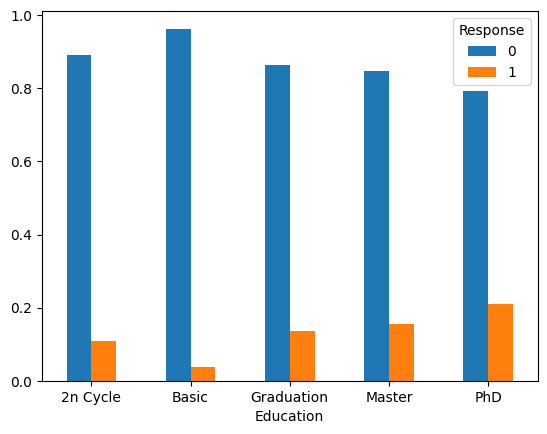

In [30]:
crosstab4.plot.bar(rot=0)

Tomando en cuenta el orden jerárquico de los niveles académicos (en orden creciente esto es: básico, secundario, graduado, máster y PhD) observamos que a medida que el nivel aumenta pareciera ser mayor la proporción de personas que se dispuesieron a aceptar la membresía.

##### Estadísticos muestrales e intervalos de confianza

In [31]:
n_bas = df[df['Education'] == 'Basic'].shape[0]
n_sec = df[df['Education'] == '2n Cycle'].shape[0]
n_grad = df[df['Education'] == 'Graduation'].shape[0]
n_mas = df[df['Education'] == 'Master'].shape[0]
n_phd = df[df['Education'] == 'PhD'].shape[0]

p_bas = df[np.logical_and(df['Response'] == 1, df['Education'] == 'Basic')].shape[0] / n_bas
p_sec = df[np.logical_and(df['Response'] == 1, df['Education'] == '2n Cycle')].shape[0] / n_sec
p_grad = df[np.logical_and(df['Response'] == 1, df['Education'] == 'Graduation')].shape[0] / n_grad
p_mas = df[np.logical_and(df['Response'] == 1, df['Education'] == 'Master')].shape[0] / n_mas
p_phd = df[np.logical_and(df['Response'] == 1, df['Education'] == 'PhD')].shape[0] / n_phd

Cálculo de los estadísticos muestrales $Z$



In [32]:
nn = [n_bas, n_sec, n_grad, n_mas, n_phd]
pp = [p_bas, p_sec, p_grad, p_mas, p_phd]
nombres = ["nivel básico", "nivel secundario", "graduado", "máster", "postdoctoral"]

Z = np.zeros([5,5])

for i in range(0,len(nn)):
  if i <= len(nn):
    for j in range(len(nn)-1, i, -1):
      Z[i,j] = (pp[i] - pp[j])/math.sqrt((pp[i]*(1-pp[i])/nn[i]) + (pp[j]*(1-pp[j])/nn[j]))
      print("Comparación entre",nombres[i],"y",nombres[j],"Z =",Z[i,j])

Comparación entre nivel básico y postdoctoral Z = -5.416229292060815
Comparación entre nivel básico y máster Z = -3.6608483899323296
Comparación entre nivel básico y graduado Z = -3.5561496872228258
Comparación entre nivel básico y nivel secundario Z = -2.1515899354548034
Comparación entre nivel secundario y postdoctoral Z = -3.419344004525804
Comparación entre nivel secundario y máster Z = -1.506455596632169
Comparación entre nivel secundario y graduado Z = -1.042794487712966
Comparación entre graduado y postdoctoral Z = -3.4579188963881813
Comparación entre graduado y máster Z = -0.85638952402269
Comparación entre máster y postdoctoral Z = -2.0721896208496613


Cálculo del $z_{critico}$

In [33]:
# Z-crítico
alfa = 0.05
z = stats.norm.ppf (q = 1-alfa/2)
print("Z-crítico: ", z)

Z-crítico:  1.959963984540054


De aquí podemos extraer las siguientes conclusiones: <br>

* Situaciones en las que rechazamos $H_{0}$ <br>
$Z_{basic-secondary} = -2.152 < -z_{\frac{\alpha}{2}} = -1.960$ <br>
$Z_{basic-gradruate} = -3.556 < -z_{\frac{\alpha}{2}} = -1.960$ <br>
$Z_{basic-master} = -3.661 < -z_{\frac{\alpha}{2}} = -1.960$ <br>
$Z_{basic-phd} = -5.416 < -z_{\frac{\alpha}{2}} = -1.960$ <br>
$Z_{secondary-phd} = -3.419 < -z_{\frac{\alpha}{2}} = -1.960$ <br>
$Z_{graduate-phd} = -3.458 < -z_{\frac{\alpha}{2}} = -1.960$ <br>
$Z_{master-phd} = -2.072 < -z_{\frac{\alpha}{2}} = -1.960$ <br>
<br>
* Situaciones en las que no rechazamos $H_{0}$ <br>
$Z_{secondary-graduate} = -1.043  -z_{\frac{\alpha}{2}} = -1.960$ <br>
$Z_{secondary-master} = -1.506 > -z_{\frac{\alpha}{2}} = -1.960$ <br>
$Z_{graduate-master} = -0.856 > -z_{\frac{\alpha}{2}} = -1.960$ <br>

Como vemos, en los únicos casos en los cuales no pareciera haber diferencias significativas es cuando comparamos entre las proporciones de personas con estudios secundarios vs graduados, secundarios vs másters, y graduados vs másters. Para todos los demás casos sí existen evidencias suficientes para rechazar $H_{0}$ y, por lo tanto, para afirmar que existen diferencias significativas.


Cálculos de los intervalos de confianza

In [34]:
IC = np.zeros([5,5,2])

for i in range(0,len(nn)):
  if i <= len(nn):
    for j in range(len(nn)-1, i, -1):
      IC[i,j,0] = (pp[i] - pp[j] - z*math.sqrt((pp[i]*(1-pp[i])/nn[i]) + (pp[j]*(1-pp[j])/nn[j])))
      IC[i,j,1] = (pp[i] - pp[j] + z*math.sqrt((pp[i]*(1-pp[i])/nn[i]) + (pp[j]*(1-pp[j])/nn[j])))
      print("IC del 95% para la comparación entre",nombres[i],"y",nombres[j],"IC =",IC[i,j])

IC del 95% para la comparación entre nivel básico y postdoctoral IC = [-0.23387539 -0.10958707]
IC del 95% para la comparación entre nivel básico y máster IC = [-0.17934699 -0.05427125]
IC del 95% para la comparación entre nivel básico y graduado IC = [-0.15261583 -0.04416211]
IC del 95% para la comparación entre nivel básico y nivel secundario IC = [-0.13942766 -0.00649826]
IC del 95% para la comparación entre nivel secundario y postdoctoral IC = [-0.15538212 -0.04215441]
IC del 95% para la comparación entre nivel secundario y máster IC = [-0.1008919   0.01319959]
IC del 95% para la comparación entre nivel secundario y graduado IC = [-0.07321497  0.02236295]
IC del 95% para la comparación entre graduado y postdoctoral IC = [-0.11491298 -0.03177154]
IC del 95% para la comparación entre graduado y máster IC = [-0.06057715  0.02373686]
IC del 95% para la comparación entre máster y postdoctoral IC = [-0.10686976 -0.00297447]


En concordancia a lo obtenido en el análisis anterior, observamos que para las comparaciones de las proporciones entre los niveles secundario vs graduado, secundario vs máster, y graduado vs máster, los intervalos de confianza contienen al 0, por lo que no tenemos evidencia suficiente para rechazar $H_{0}$. En todos los demás casos, sí se observa evidencia suficiente para rechazar $H_{0}$ y, por lo tanto, para afirmar que existen diferencias significativas. <br>
Además, en los casos en los que se presentan diferencias, para todos ellos, todos los valores dentro del intervalo de confianza son negativos, lo que implica que a mayor nivel educativo mayor es la proporción de personas que aceptaron la membresía.

#### ¿Es el estado civil un factor influyente en la decisión de aceptar la membresía?

Para responder esta pregunta debemos evaluar si existen diferencias significativas entre las proporciones de personas que aceptan la membresía en función de su estado civil. Así nuestra variable respuesta será `Response` y nuestra variable predictora será `Marital_Status`.<br>
<br>
* Parámetro poblacional de interés: <br>
$ p_{i} - p_{j} $ <br>
donde: <br>
$ p_{i} $ : proporción de personas de estado civil $ i $ que aceptaron la membresía sobre el total de personas de estado civil $ i $. <br>
$ p_{j} $ : proporción de personas de estado civil $ j $ que aceptaron la membresía sobre el total de personas de estado civil $ j $. <br>
siendo: <br>
${i,j}$ : {Married, Together, Divorce, Widow, Single}<br>
<br>
* HIPÓTESIS: <br>
$ H_{0}: p_{i} - p_{j} = 0 $ para algún $i,j$<br>
$ H_{1}: p_{i} - p_{j} ≠ 0 $ para algún $i,j$<br>
<br>
* Estadístico muestral para realizar la estimación: <br>
$ Z = \frac{p̂_{i} - p̂_{j}}{\sqrt{\frac{p̂_{i}(1-p̂_{i})}{n_{i}} + \frac{p̂_{j}(1-p̂_{j})}{n_{j}}}} $ <br>
donde: <br>
$ p̂_{i} $ : proporción muestral de personas con estado civil $i$ que aceptaron la membresía. <br>
$ p̂_{j} $ : proporción muestral de personas con estado civil $j$ que aceptaron la membresía. <br>
$ n_{i} $ : total de personas con estado civil $i$. <br>
$ n_{j} $ : total de personas con estado civil $j$. <br>
<br>
* Valor Z crítico: <br>
Sea $ z_{\frac{\alpha}{2}} $ el valor $ z_{critico} $ que deja un área de $ \frac{\alpha}{2} $ a derecha y un área de $ \frac{\alpha}{2} $ a izquierda. La hipótesis nula se rechazará si: <br>
$ Z < -z_{\frac{\alpha}{2}} $ o $ Z > z_{\frac{\alpha}{2}} $
<br>

* INTERVALO DE CONFIANZA: <br>
$ (p̂_{i} - p̂_{j}) - z_{\frac{\alpha}{2}}\sqrt{\frac{p̂_{i}(1-p̂_{i})}{n_{i}} + \frac{p̂_{j}(1-p̂_{j})}{n_{j}}} $ , $ (p̂_{i} - p̂_{j}) + z_{\frac{\alpha}{2}}\sqrt{\frac{p̂_{i}(1-p̂_{i})}{n_{i}} + \frac{p̂_{j}(1-p̂_{j})}{n_{j}}} $ <br>
Utilizaremos un nivel de confianza del 95% (es decir, un nivel de significancia $ \alpha $ del 5%). <br>
<br>
* Interpretación del intervalo de confianza: <br>
Si para alguna combinación $i,j$ el 0 está contenido dentro del intervalo, entonces podremos afirmar con un 95% de confianza que existen diferencias significativas entre la proporción de personas que aceptaron la membresía según su estado civil. Por el contrario, si el 0 no está contenido, entonces no podremos afirmar que existan diferencias significativas.

##### Resumen numérico y gráfico

In [35]:
crosstab = pd.crosstab(df['Marital_Status'], df['Response'], normalize='index')
crosstab

Response,0,1
Marital_Status,,
Divorced,0.793103,0.206897
Married,0.885648,0.114352
Single,0.774262,0.225738
Together,0.895288,0.104712
Widow,0.763158,0.236842


<AxesSubplot: xlabel='Marital_Status'>

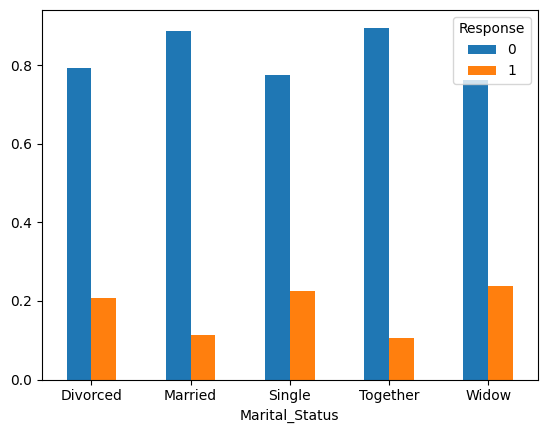

In [36]:
crosstab.plot.bar(rot = 0)

Se observa que es mayor la proporción de personas que aceptaron la membresía en los casos en los que su estado civil era divorciado, soltero o viudo. Algo que estas categorías tienen en común es que todas ellas implican el no poseer pareja, en contraposición a los casos de las personas casadas o juntadas que parecen evidenciar una menor predisposicón a aceptar la membresía.

##### Estadísticos muestrales e intervalos de confianza

In [37]:
n_marr = df[df['Marital_Status'] == 'Married'].shape[0]
n_div = df[df['Marital_Status'] == 'Divorced'].shape[0]
n_sing = df[df['Marital_Status'] == 'Single'].shape[0]
n_tog = df[df['Marital_Status'] == 'Together'].shape[0]
n_wid = df[df['Marital_Status'] == 'Widow'].shape[0]

p_marr = df[np.logical_and(df['Response'] == 1, df['Marital_Status'] == 'Married')].shape[0] / n_marr
p_div = df[np.logical_and(df['Response'] == 1, df['Marital_Status'] == 'Divorced')].shape[0] / n_div
p_sing = df[np.logical_and(df['Response'] == 1, df['Marital_Status'] == 'Single')].shape[0] / n_sing
p_tog = df[np.logical_and(df['Response'] == 1, df['Marital_Status'] == 'Together')].shape[0] / n_tog
p_wid = df[np.logical_and(df['Response'] == 1, df['Marital_Status'] == 'Widow')].shape[0] / n_wid

Cálculo de los estadísticos muestrales $Z$

In [38]:
nmt = [n_marr, n_tog, n_sing, n_div, n_wid]
pmt = [p_marr, p_tog, p_sing, p_div, p_wid]
nombresmt = ["casado", "juntado", "soltero", "divorciado", "viudo"]

Z = np.zeros([5,5])

for i in range(0,len(nmt)):
  if i <= len(nn):
    for j in range(i+1, len(nmt)):
      Z[i,j] = (pmt[i] - pmt[j])/math.sqrt((pmt[i]*(1-pmt[i])/nmt[i]) + (pmt[j]*(1-pmt[j])/nmt[j]))
      print("Comparación entre",nombresmt[i],"y",nombresmt[j],"Z =",Z[i,j])

Comparación entre casado y juntado Z = 0.5742954831538931
Comparación entre casado y soltero Z = -5.047846432814938
Comparación entre casado y divorciado Z = -3.221074234078051
Comparación entre casado y viudo Z = -2.45154181822002
Comparación entre juntado y soltero Z = -5.245464939790875
Comparación entre juntado y divorciado Z = -3.4626004317981565
Comparación entre juntado y viudo Z = -2.6207461529348026
Comparación entre soltero y divorciado Z = 0.5743980522341677
Comparación entre soltero y viudo Z = -0.21185510009254702
Comparación entre divorciado y viudo Z = -0.5390960841354727


Cálculo del $z_{critico}$

In [39]:
# Z-crítico
alfa = 0.05
z = stats.norm.ppf (q = 1-alfa/2)
print("Z-crítico: ", z)

Z-crítico:  1.959963984540054


De aquí podemos extraer las siguientes conclusiones: <br>

* Situaciones en las que rechazamos $H_{0}$ <br>
$Z_{married-single} = -5.048 < -z_{\frac{\alpha}{2}} = -1.960$ <br>
$Z_{married-divorced} = -3.221 < -z_{\frac{\alpha}{2}} = -1.960$ <br>
$Z_{married-widow} = -2.452 < -z_{\frac{\alpha}{2}} = -1.960$ <br>
$Z_{together-single} = -5.245 < -z_{\frac{\alpha}{2}} = -1.960$ <br>
$Z_{together-divorced} = -3.463 < -z_{\frac{\alpha}{2}} = -1.960$ <br>
$Z_{together-widow} = -2.621 < -z_{\frac{\alpha}{2}} = -1.960$ <br>

* Situaciones en las que no se rechaza $H_{0}$ <br>
$Z_{married-together} = 0.574 < z_{\frac{\alpha}{2}} = 1.960$ <br>
$Z_{single-divorced} = 0.574 < z_{\frac{\alpha}{2}} = 1.960$ <br>
$Z_{single-widow} = -0.212 > -z_{\frac{\alpha}{2}} = -1.960$ <br>
$Z_{divorced-widow} = -0.539 > -z_{\frac{\alpha}{2}} = -1.960$ <br>

Así, observamos que en los únicos casos en los cuales no pareciera haber diferencias significativas es cuando comparamos entre las proporciones de personas con estado civil casado vs juntado, soltero vs divorciado, soltero vs viudo, y divorciado vs viudo. Para todos los demás casos sí existen evidencias suficientes para rechazar $H_{0}$ y por lo tanto afirmar que existen diferencias significativas.

##### Intervalos de confianza

In [40]:
ICmt = np.zeros([5,5,2])

for i in range(0,len(nmt)):
  if i <= len(nmt):
    for j in range(len(nn)-1, i, -1):
      ICmt[i,j,0] = (pmt[i] - pmt[j] - z*math.sqrt((pmt[i]*(1-pmt[i])/nmt[i]) + (pmt[j]*(1-pmt[j])/nmt[j])))
      ICmt[i,j,1] = (pmt[i] - pmt[j] + z*math.sqrt((pmt[i]*(1-pmt[i])/nmt[i]) + (pmt[j]*(1-pmt[j])/nmt[j])))
      print("IC del 95% para la comparación entre",nombresmt[i],"y",nombresmt[j]," IC =",ICmt[i,j])

IC del 95% para la comparación entre casado y viudo  IC = [-0.22041806 -0.02456137]
IC del 95% para la comparación entre casado y divorciado  IC = [-0.14885557 -0.03623275]
IC del 95% para la comparación entre casado y soltero  IC = [-0.15463466 -0.06813735]
IC del 95% para la comparación entre casado y juntado  IC = [-0.02326038  0.04254108]
IC del 95% para la comparación entre juntado y viudo  IC = [-0.2309455  -0.03331463]
IC del 95% para la comparación entre juntado y divorciado  IC = [-0.16002484 -0.04434418]
IC del 95% para la comparación entre juntado y soltero  IC = [-0.16624776 -0.07580495]
IC del 95% para la comparación entre soltero y viudo  IC = [-0.11382896  0.09162155]
IC del 95% para la comparación entre soltero y divorciado  IC = [-0.0454504   0.08313408]
IC del 95% para la comparación entre divorciado y viudo  IC = [-0.13881707  0.07892596]


Nuevamente, con los intervalos de confianza, se evidencia la misma conclusión a la que llegamos en el punto anterior. Para las comparaciones entre casado vs juntado, soltero vs divorciado, soltero vs viudo y divorciado vs viudo, los intervalos de confianza de la diferencia de proporciones contienen al 0, por lo que no tenemos evidencias para rechazar la hipótesis nula. Por el contrario, todos los demás intervalos no contienen al 0, con lo que queda rechazada la hipótesis nula y podemos concluir que existen diferencias significativas. <br>
Además, en los casos que presentan diferencias, se evidencia lo que observamos durante el análisis de los resúmenes gráficos y numéricos: cuando la comparación se realiza entre dos categorías que implican estar en pareja, o dos categorías que implican no estarlo, no se observan diferencias significativas; mientras que cuando se compara una categoría que implica estar en pareja, frente a otra que implica no estarlo, en todos los casos se observan diferencias significativas, y en todos ellos la proporción de personas sin pareja que decidieron aceptar la membresía es mayor que la proporción de personas con pareja que lo hicieron.

#### ¿Es la existencia de niños y adolescentes en el hogar un factor influyente en la desición de aceptar la membresía?

Para responder esta pregunta debemos evaluar si existen diferencias significativas entre las proporciones de personas que aceptan la membresía en función de si tienen niños o adolescentes viviendo en su hogar. Así nuestra variable respuesta será `Response`, y nuestra variable predictora será `Has_kids_or_teens`, una variable booleana auxiliar que crearemos unificando los valores de `Kidhome` y `Teenhome`. <br>
<br>
* Parámetro poblacional de interés: <br>
$ p_{1} - p_{2} $ <br>
donde: <br>
$ p_{1} $ : proporción de personas de con niños o adolescentes en el hogar que aceptaron la membresía, sobre el total de personas con niños o adolescentes en el hogar. <br>
$ p_{2} $ : proporción de personas sin niños o adolescentes en el hogar que aceptaron la membresía, sobre el total de personas sin niños o adolescentes en el hogar. <br>
<br>
* HIPÓTESIS: <br>
$ H_{0}: p_{1} - p_{2} = 0 $ <br>
$ H_{1}: p_{1} - p_{2} ≠ 0 $ <br>
<br>
* Estadístico muestral para realizar la estimación: <br>
$ Z = \frac{p̂_{i} - p̂_{j}}{\sqrt{\frac{p̂_{i}(1-p̂_{i})}{n_{i}} + \frac{p̂_{j}(1-p̂_{j})}{n_{j}}}} $ <br>
donde: <br>
$ p̂_{i} $ : proporción muestral de personas con niños o adolescentes en el hogar que aceptaron la membresía. <br>
$ p̂_{j} $ : proporción muestral de personas sin niños o adolescentes en el hogar que aceptaron la membresía. <br>
$ n_{i} $ : total de personas con niños o adolescentes en el hogar. <br>
$ n_{j} $ : total de personas sin niños o adolescentes en el hogar. <br>
<br>
* Valor Z crítico: <br>
Sea $ z_{\frac{\alpha}{2}} $ el valor $ z_{critico} $ que deja un área de $ \frac{\alpha}{2} $ a derecha y un área de $ \frac{\alpha}{2} $ a izquierda. La hipótesis nula se rechazará si: <br>
$ Z < -z_{\frac{\alpha}{2}} $ o $ Z > z_{\frac{\alpha}{2}} $
<br>

* INTERVALO DE CONFIANZA: <br>
$ (p̂_{i} - p̂_{j}) - z_{\frac{\alpha}{2}}\sqrt{\frac{p̂_{i}(1-p̂_{i})}{n_{i}} + \frac{p̂_{j}(1-p̂_{j})}{n_{j}}} $ , $ (p̂_{i} - p̂_{j}) + z_{\frac{\alpha}{2}}\sqrt{\frac{p̂_{i}(1-p̂_{i})}{n_{i}} + \frac{p̂_{j}(1-p̂_{j})}{n_{j}}} $ <br>
Utilizaremos un nivel de confianza del 95% (es decir, un nivel de significancia $ \alpha $ del 5%). <br>
<br>
* Interpretación del intervalo de confianza: <br>
Si para alguna combinación $i,j$ el 0 está contenido dentro del intervalo, entonces podremos afirmar con un 95% de confianza que existen diferencias significativas entre la proporción de personas que aceptaron la membresía según si tienen niños o adolescentes viviendo en su hogar. Por el contrario, si el 0 no está contenido, entonces no podremos afirmar que existan diferencias significativas.

##### Resúmen numérico y grpafico

In [41]:
has_kids_or_teens = []
for i in range(0, df.shape[0]):
  if np.logical_or(df['Kidhome'][i] > 0, df['Teenhome'][i] > 0):
    has_kids_or_teens.append('Yes')
  else:
    has_kids_or_teens.append('No')
df['Has_kids_or_teens'] = has_kids_or_teens
crosstab2 = pd.crosstab(df['Has_kids_or_teens'], df['Response'], normalize='index')
crosstab2

Response,0,1
Has_kids_or_teens,,
No,0.735341,0.264659
Yes,0.896268,0.103732


<AxesSubplot: xlabel='Has_kids_or_teens'>

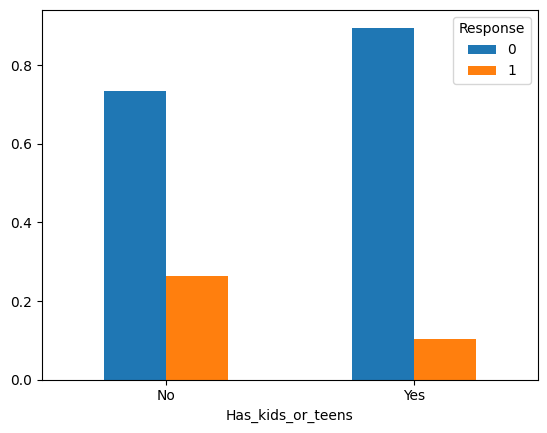

In [42]:
crosstab2.plot.bar(rot = 0)

La observación pareciera evidenciar que es mayor la proporción de personas que no conviven con niños o adolescentes que decidieron aceptar la membresía, frente a las personas que también lo hicieron pero conviven con niños o adolescentes en el hogar.

##### Estadístico muestral e intervalo de confianza

In [43]:
n_has = df[df['Has_kids_or_teens'] == 'Yes'].shape[0]
n_nohas = df[df['Has_kids_or_teens'] == 'No'].shape[0]

p_has = df[np.logical_and(df['Response'] == 1, df['Has_kids_or_teens'] == 'Yes')].shape[0] / n_has
p_nohas = df[np.logical_and(df['Response'] == 1, df['Has_kids_or_teens'] == 'No')].shape[0] / n_nohas

Cálculo del estadístico muestral $Z$

In [44]:
Zkt = (p_has - p_nohas)/math.sqrt((p_has*(1-p_has)/n_has) + (p_nohas*(1-p_nohas)/n_nohas))
print("Z =",Zkt)

Z = -8.397733827994102


Cálculo del $z_{critico}$

In [45]:
# Z-crítico
alfa = 0.05
z = stats.norm.ppf (q = 1-alfa/2)
print("Z-crítico: ", z)

Z-crítico:  1.959963984540054


Se observa que: <br> 
$Z = -8.398 < -z_{\frac{\alpha}{2}} = -1.960$ <br>
por lo que tenemos evidencias suficientes para rechazar la hipótesis nula y, por consiguiente, afirmar que existen diferencias significativas entre la proporción de personas que conviven con niños o adolescentes y aceptaron la membresía, y la proporción de personas que también la aceptaron pero no conviven con niños o adolescentes en el hogar.

Cálculo del intervalo de confianza

In [46]:
ICkt = [(p_has - p_nohas - z*math.sqrt((p_has*(1-p_has)/n_has) + (p_nohas*(1-p_nohas)/n_nohas))), (p_has - p_nohas + z*math.sqrt((p_has*(1-p_has)/n_has) + (p_nohas*(1-p_nohas)/n_nohas)))]
print("Intervalo de confianza del 95%:",ICkt)

Intervalo de confianza del 95%: [-0.19848663817345677, -0.12336827320983798]


Observamos que el intervalo de confianza no contiene al 0 por lo que, nuevamente, se tiene evidencia suficiente para rechazar la hipótesis nula y afirmar que existen diferencias significativas entre ambas proporciones.

#### ¿Es la cantidad total gastada en la compra de productos en los últimos dos años un factor influyente en la decisión de aceptar la membresía?

Para responder esta pregunta debemos evaluar si existen diferencias significativas entre la media de la cantidad todal de lo que las personas que aceptaron la membresía gastaron en los últimos 2 años y la media de la cantidad total de lo que las personas que no la aceptaron gastaron en los últimos 2 años. Así nuestra variable respuesta será `Response` y nuestra variable predictora será `MntTotal`, una columna auxiliar que se creará combinando los valores de `MntMeatProducts`, `MntFishProducts`, `MntSweetProducts`, `MntFruits`, `MntWines` y `MntGoldProds`.<br>
<br>
* Parámetro poblacional de interés: <br>
$ \mu_{1} - \mu_{2} $ <br>
donde: <br>
$ \mu_{1} $ : media de la cantidad total gastada en productos en los últimos dos años por las personas que no aceptaron la membresía. <br>
$ \mu_{2} $ : media de la cantidad total gastada en productos en los últimos dos años por las personas que aceptaron la membresía. <br>
<br>
* HIPÓTESIS: <br>
$ H_{0}: \mu_{0} - \mu_{1} = 0 $ <br>
$ H_{1}: \mu_{0} - \mu_{1} ≠ 0 $ <br>
<br>
* Estadístico muestral para realizar la estimación: <br>
$ T = \frac{x̄_{1} - x̄_{2}}{\sqrt{\frac{s^{2}_{1}}{n_{1}} + \frac{s^{2}_{2}}{n_{1}}}} $ <br>
donde: <br>
$ x̄_{1} $ : media muestral de la cantidad total gastada en productos en los últimos dos años por las personas que no aceptaron la membresía. <br>
$ x̄_{2} $ : media muestral de la cantidad total gastada en productos en los últimos dos años por las personas que aceptaron la membresía. <br>
$ s_{1} $ : desvío estándar muestral de la cantidad total gastada en productos en los últimos dos años por las personas que no aceptaron la membresía. <br>
$ s_{2} $ : desvío estándar muestral de la cantidad total gastada en productos en los últimos dos años por las personas que aceptaron la membresía. <br>
$ n_{1} $ : tamaño de la muestra de la cantidad total gastada en productos en los últimos dos años por las personas que no aceptaron la membresía. <br>
$ n_{2} $ : tamaño de la muestra de la cantidad total gastada en productos en los últimos dos años por las personas que aceptaron la membresía. <br>
<br>
* Valor T crítico: <br>
Sea $ t_{\frac{\alpha}{2},\nu} $ el valor $ t_{critico} $ que deja un área de $ \frac{\alpha}{2} $ a derecha y un área de $ \frac{\alpha}{2} $ a izquierda con $ \nu $ grados de libertad. La hipótesis nula se rechazará si: <br>
$ T < -t_{\frac{\alpha}{2},\nu} $ o $ T > t_{\frac{\alpha}{2},\nu} $
<br>

* INTERVALO DE CONFIANZA: <br>
$ (x̄_{1} - x̄_{2}) - t_{\frac{\alpha}{2},\nu}\sqrt{\frac{s^{2}_{1}}{n_{1}} + \frac{s^{2}_{2}}{n_{1}}} $ , $ (x̄_{1} - x̄_{2}) + t_{\frac{\alpha}{2},\nu}\sqrt{\frac{s^{2}_{1}}{n_{1}} + \frac{s^{2}_{2}}{n_{1}}} $ <br>
Utilizaremos un nivel de confianza del 95% (es decir, un nivel de significancia $ \alpha $ del 5%). <br>
<br>
* Interpretación del intervalo de confianza: <br>
Si el 0 está contenido dentro del intervalo, entonces podremos afirmar con un 95% de confianza que existen diferencias significativas entre las medias de las cantidades totales gastadas en productos de quienes aceptaron la membresía y quienes no lo hicieron. Por el contrario, si el 0 no está contenido, entonces no podremos afirmar que existan diferencias significativas.

##### Resumen numérico y gráfico

In [47]:
mnt_total = []

for i in range(0, df.shape[0]):
  suma = df['MntMeatProducts'][i] + df['MntFishProducts'][i] + df['MntSweetProducts'][i] + df['MntFruits'][i] + df['MntWines'][i] + df['MntGoldProds'][i]
  mnt_total.append(suma)

df['MntTotal'] = mnt_total

In [48]:
df.groupby('Response')['MntTotal'].describe()

,count,mean,std,min,25%,50%,75%,max
Response,,,,,,,,
0,1881.0,539.851675,553.87010,5.0,62.0,313.0,957.0,2525.0
1,331.0,986.661631,720.79571,17.0,249.0,1053.0,1619.0,2525.0


<AxesSubplot: xlabel='Response', ylabel='MntTotal'>

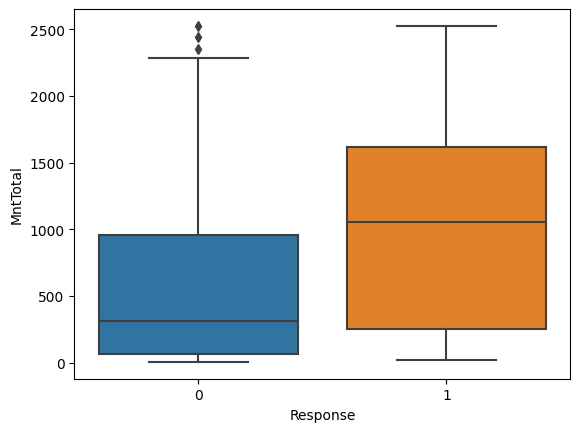

In [49]:
sns.boxplot(x='Response', y='MntTotal', data=df)

Se observa que la mediana de la cantidad total gastada en productos durante los 2 últimos años es mayor para el caso de las personas que aceptaron la membresía en comparación a quienes lo hicieron. La variabilidad también es ligeramente mayor en este caso. En el caso de las personas que no aceptaron la membresía se observan outliers.

##### Estadístico muestral e intervalo de confianza

Cálculo del estadístico muestral $T$

In [50]:
total_no = df[df['Response'] == 0]['MntTotal']
total_si = df[df['Response'] == 1]['MntTotal']

xx_1 = total_no.mean()
xx_2 = total_si.mean()
ss_1 = total_no.std()
ss_2 = total_si.std()
nn_1 = total_no.size
nn_2 = total_si.size

T = (xx_1 - xx_2)/math.sqrt(ss_1**2/nn_1 + ss_2**2/nn_2)
print("T =", T)

T = -10.73393766300523


Luego, para poder calcular nuestro valor $ t_{critico} $ necesitamos saber si las varianzas de nuestras muestras son iguales o diferentes, ya que los grados de libertad son muy sensibles a ello. Para esto utilizaremos el test de Levene. Si el p-valor obtenido es mayor a 0.05 podremos suponer que las varianzas de ambas muestras son iguales, mientras que si es menor supondremos que las mismas son diferentes.

In [51]:
# Test de levene para evaluar si las varianzas son iguales o no
print("p-valor =", stats.levene(resp_no, resp_si)[1])

p-valor = 3.846227117543062e-05


Como nuestro p-valor es de 0.000038 aproximadamente, supondremos que las varianzas de las muestras son diferentes. Así, los grados de libertad estarán dados por: <br>
$ \nu = \frac{(\frac{s^{2}_{1}}{n_{1}} + \frac{s^{2}_{2}}{n_{2}})^2}{\frac{(\frac{s^{2}_{1}}{n_{1}})^{2}}{n_{1} - 1} + \frac{(\frac{s^{2}_{2}}{n_{2}})^{2}}{n_{2} - 1}} $ <br>
Habiendo obtenido esto, podremos calcular el $t_{critico}$. 

In [52]:
# Grados de libertad
gll = ((ss_1**2/nn_1) + (ss_2**2/nn_2))**2/(((ss_1**2/nn_1)**2)/(nn_1 - 1) + ((ss_2**2/nn_2)**2)/(nn_2 - 1))

# T crítico
alfa = 0.05
tt = stats.t.ppf (q = 1-alfa/2, df = gll)
print("T-crítico: ", t)

T-crítico:  1.964939198427694


En este punto ya podemos observar que se cumple: <br>
$ T = -10.734 < -t_{\frac{\alpha}{2},\nu} = -1.966 $ , <br>
por lo que tenemos evidencias para rechazar la hipótesis nula y afirmar que existen diferencias significativas entre la media de la totalidad gastada en productos en los últimos 2 años de las personas que aceptaron la membresía, y la media de las personas que no lo hicieron.

Cálculo del intervalo de confianza

In [53]:
ICC = [xx_1 - xx_2 - tt * math.sqrt((ss_1**2/nn_1) + (ss_2**2/nn_2)), xx_1 - xx_2 + t * math.sqrt((ss_1**2/nn_1) + (ss_2**2/nn_2))]
print("Intervalo de confianza:", ICC)

Intervalo de confianza: [-528.6420003529346, -365.01756838545066]


Observamos que el intervalo de confianza no contiene al 0, por lo que nuevamente tenemos evidencia para descartar la hipótesis nula. Además, todos los valores del intervalo son negativos, lo que indica que la media de la cantidad total gastada en productos en los últimos 2 años de las personas que aceptaron la membresía es mayor que las personas que no lo hicieron.

### *Conclusiones*

De todo lo anteriormente analizado hemos podido constatar que existen factores relacionados significativamente con la decisión de aceptar o rechazar la membresía. Así podemos concluir que la probabilidad de aceptar la membresía aumenta conforme se presenta al menos una de las siguientes situaciones: <br>
- aumento en el salario anual
- aumento en el nivel educativo
- aumento en el monto total gastado en productos durante los últimos 2 años
- no se está en pareja
- no hay niños o adolescentes en el hogar